### Система ОДУ

$$ x' = y $$
$$ y' = x^2 - 1 $$

In [1]:
# libraries include
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [2]:
# Problem
def x_f(x, y):
    return y
def y_f(x, y):
    return x ** 2 - 1

# Метод Рунге Кутты

Выберем метод 4 порядка, т.к. это один из наиболее популярных методов для численного решения ОДУ из-за его хорошего баланса точности и сложности.

### Параметры:
- Метод: явный
- Порядок: 4

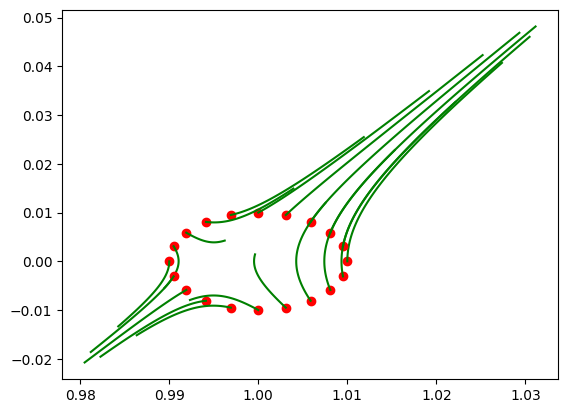

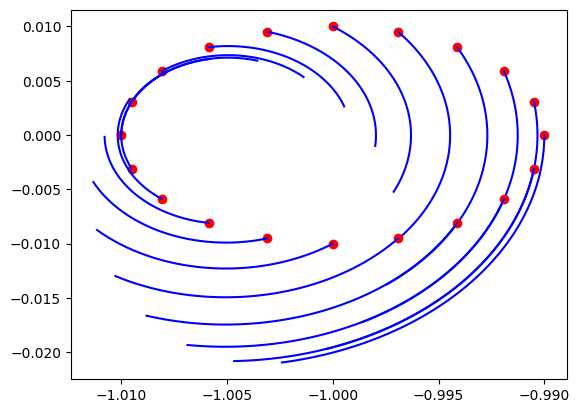

In [3]:
def runge_kutta_4(f1, f2, x0, y0, h, N):
    x_values = [x0]
    y_values = [y0]
    for i in range(N - 1):
      
        xi, yi = x_values[i], y_values[i]

        k1_x = h * f1(xi, yi)
        k1_y = h * f2(xi, yi)

        k2_x = h * f1(xi + h / 2, yi + k1_y / 2)
        k2_y = h * f2(xi + h / 2, yi + k1_x / 2)

        k3_x = h * f1(xi + h / 2, yi + k2_y / 2)
        k3_y = h * f2(xi + h / 2, yi + k2_x / 2)

        k4_x = h * f1(xi + h, yi + k3_y)
        k4_y = h * f2(xi + h, yi + k3_x)

        xi_next = xi + (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6
        yi_next = yi + (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6

        x_values.append(xi_next)
        y_values.append(yi_next)

    return x_values, y_values
    

R = 0.01

for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
    x_values, y_values = runge_kutta_4(x_f, y_f,  1 + R * np.cos(phi), R * np.sin(phi), 0.01, 100)
    plt.plot(x_values[0], y_values[0], marker='o', color='red')
    plt.plot(x_values, y_values, color='green')
plt.show()
    
for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
    x_values, y_values = runge_kutta_4(x_f, y_f,  -1 + R * np.cos(phi), R * np.sin(phi), 0.01, 100)
    plt.plot(x_values[0], y_values[0], marker='o', color='red')
    plt.plot(x_values, y_values, color='blue')
plt.show()


# Метод Адамса
Реализуем один из явных методов Адамса: Адамса-Башфорта 4 порядка

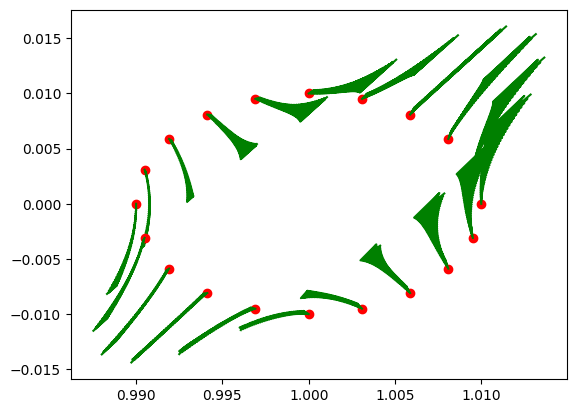

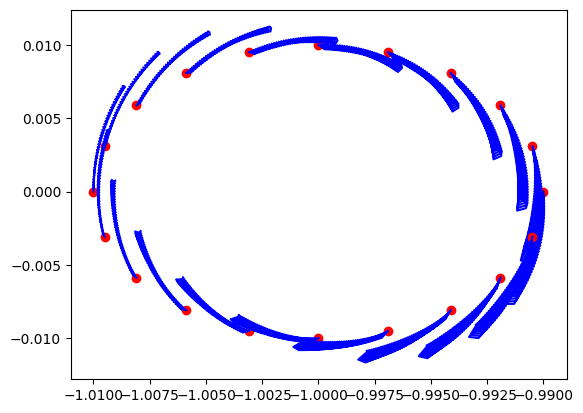

In [10]:
def adams_moulton_4(f1, f2, x0, y0, h, N):
    # Получаем первые 4 точки:
    x_values, y_values = runge_kutta_4(f1, f2, x0, y0, h, 4)
    
    for i in range(N - 4):
        # Предсказываем следующую точку с помощью Адамса-Башфорта
        x_next = x_values[i] + h * (55 * f1(x_values[i], y_values[i]) - 59 * f1(x_values[i - 1], y_values[i - 1]) + 37 * f1(x_values[i - 2], y_values[i - 2]) - 9 * f1(x_values[i - 3], y_values[i - 3])) / 24
        y_next = y_values[i] + h * (55 * f2(x_values[i], y_values[i]) - 59 * f2(x_values[i - 1], y_values[i - 1]) + 37 * f2(x_values[i - 2], y_values[i - 2]) - 9 * f2(x_values[i - 3], y_values[i - 3])) / 24

        x_values.append(x_next)
        y_values.append(y_next)
    
    return x_values, y_values
    

for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
    x_values, y_values = adams_moulton_4(x_f, y_f,  1 + R * np.cos(phi), R * np.sin(phi), 0.01, 150)
    plt.plot(x_values[0], y_values[0], marker='o', color='red')
    plt.plot(x_values, y_values, color='green')
plt.show()
    
for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
    x_values, y_values = adams_moulton_4(x_f, y_f,  -1 + R * np.cos(phi), R * np.sin(phi), 0.01, 150)
    plt.plot(x_values[0], y_values[0], marker='o', color='red')
    plt.plot(x_values, y_values, color='blue')
plt.show()
    

# Метод ФДН:
При k = 3 построенная схема неустойчива, поэтому непригодна для практических расчетов, но из интереса построим

### Параметры:
- Метод: явный
- Порядок: 3

$$ \frac{1}{3}y_{n+1} + \frac{1}{2}y_{n} - y_{n-1} + \frac{1}{6}y_{n-2} = hf_n $$
$$ y_{n+1} = 3hf_n - \frac{3}{2}y_{n} + 3y_{n-1} - \frac{1}{2}y_{n-2}$$


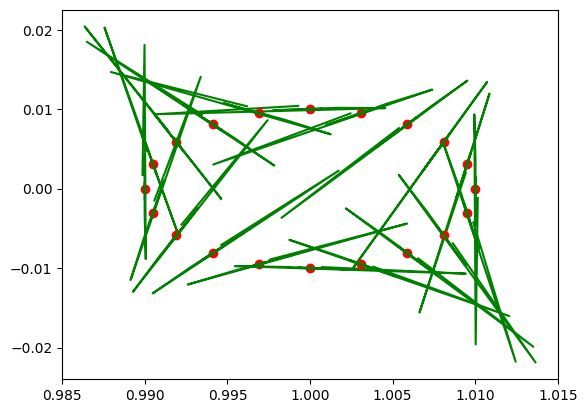

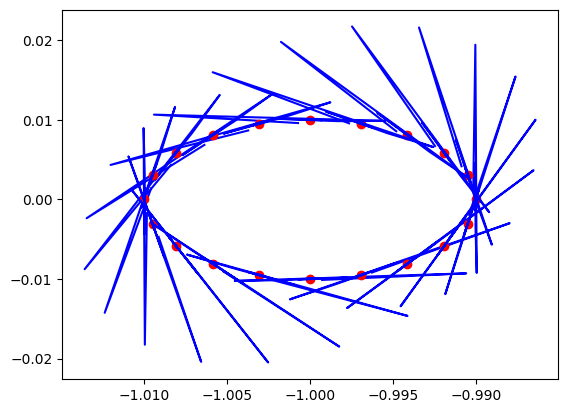

In [5]:
def explicit_gear3(f1, f2, x0, y0, h, N):
    # Получаем первые 4 точки:
    x_values, y_values = runge_kutta_4(f1, f2, x0, y0, h, 2)
    
    for i in range(N - 2):

        x_next = 3 * h * f1(x_values[i], y_values[i]) - 3 / 2 * x_values[i] + 3 * x_values[i - 1] - 1 / 2 * x_values[i - 2]
        y_next = 3 * h * f2(x_values[i], y_values[i]) - 3 / 2 * y_values[i] + 3 * y_values[i - 1] - 1 / 2 * y_values[i - 2]


        x_values.append(x_next)
        y_values.append(y_next)
    
    return x_values, y_values
    

R = 0.01
for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
    x_values, y_values = explicit_gear3(x_f, y_f,  1 + R * np.cos(phi), R * np.sin(phi), 0.001, 15)
    plt.plot(x_values[0], y_values[0], marker='o', color='red')
    plt.plot(x_values, y_values, color='green')
plt.show()
    
for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
    x_values, y_values = explicit_gear3(x_f, y_f,  -1 + R * np.cos(phi), R * np.sin(phi), 0.001, 15)
    plt.plot(x_values[0], y_values[0], marker='o', color='red')
    plt.plot(x_values, y_values, color='blue')
plt.show()
    

Теперь возьмем явный метод ФДН 2ого порядка:
### Параметры:
- Метод: явный
- Порядок: 2


$$ y_{n+1} = 2hf_n + y_{n-1} $$

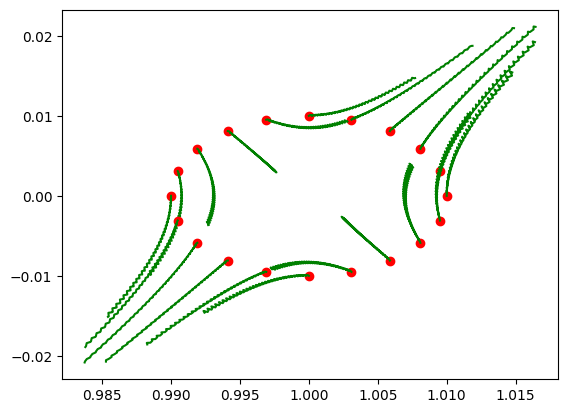

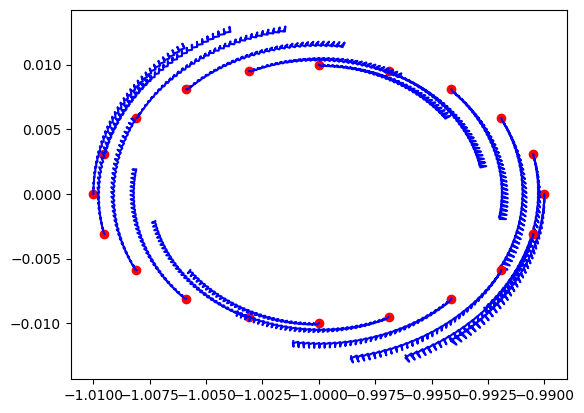

In [6]:
def explicit_gear2(f1, f2, x0, y0, h, N):
    # Получаем первые 4 точки:
    x_values, y_values = runge_kutta_4(f1, f2, x0, y0, h, 2)
    
    for i in range(N - 2):

        x_next = 2 * h * f1(x_values[i], y_values[i]) + x_values[i - 1]
        y_next = 2 * h * f2(x_values[i], y_values[i]) + y_values[i - 1]


        x_values.append(x_next)
        y_values.append(y_next)
    
    return x_values, y_values
    

for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
    x_values, y_values = explicit_gear2(x_f, y_f,  1 + R * np.cos(phi), R * np.sin(phi), 0.01, 100)
    plt.plot(x_values[0], y_values[0], marker='o', color='red')
    plt.plot(x_values, y_values, color='green')
plt.show()
    
for phi in np.arange(0, 2 * np.pi, np.pi * 0.1):
    x_values, y_values = explicit_gear2(x_f, y_f,  -1 + R * np.cos(phi), R * np.sin(phi), 0.01, 100)
    plt.plot(x_values[0], y_values[0], marker='o', color='red')
    plt.plot(x_values, y_values, color='blue')
plt.show()
    